In [25]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [26]:
conn = sqlite3.connect('/home/james/.cache/.fr-VsldyL/im.db')

In [27]:
pd.read_sql("""

SELECT *
FROM movie_basics


""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [28]:
pd.read_sql("""

SELECT *
FROM movie_basics


""", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [29]:
pd.read_sql("""

SELECT *
FROM movie_ratings


""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [30]:
pd.read_sql("""

SELECT *
FROM movie_ratings


""", conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [31]:
pd.read_sql("""

SELECT mb.movie_id, mb.genres, mr.averagerating, mr.numvotes
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mb.movie_id = mr.movie_id

""", conn)

,movie_id,genres,averagerating,numvotes
0,tt0063540,"Action,Crime,Drama",7.0,77
1,tt0066787,"Biography,Drama",7.2,43
2,tt0069049,Drama,6.9,4517
3,tt0069204,"Comedy,Drama",6.1,13
4,tt0100275,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
73851,tt9913084,Documentary,6.2,6
73852,tt9914286,"Drama,Family",8.7,136
73853,tt9914642,Documentary,8.5,8
73854,tt9914942,None,6.6,5


## Data Preparation

In [32]:
# Converting to pd.DataFrame for cleaner manipulation

genre_df = pd.DataFrame(pd.read_sql("""

SELECT mb.movie_id, mb.genres, mr.averagerating, mr.numvotes
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mb.movie_id = mr.movie_id

""", conn))

In [33]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   genres         73052 non-null  object 
 2   averagerating  73856 non-null  float64
 3   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [34]:
genre_df.isna().sum()

movie_id           0
genres           804
averagerating      0
numvotes           0
dtype: int64

In [35]:
genre_df = genre_df.dropna(subset=['genres'])

genre_df

,movie_id,genres,averagerating,numvotes
0,tt0063540,"Action,Crime,Drama",7.0,77
1,tt0066787,"Biography,Drama",7.2,43
2,tt0069049,Drama,6.9,4517
3,tt0069204,"Comedy,Drama",6.1,13
4,tt0100275,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
73850,tt9913056,Documentary,6.2,5
73851,tt9913084,Documentary,6.2,6
73852,tt9914286,"Drama,Family",8.7,136
73853,tt9914642,Documentary,8.5,8


In [36]:
genre_df.describe()

,averagerating,numvotes
count,73052.000000,7.305200e+04
mean,6.330930,3.562173e+03
std,1.474699,3.045804e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,5.000000e+01
75%,7.400000,2.890000e+02
max,10.000000,1.841066e+06


In [37]:
genre_df.describe(include='object')

,movie_id,genres
count,73052,73052
unique,73052,923
top,tt4034380,Drama
freq,1,11612


In [38]:
# creating new column for movies with multiple genres into a list 
# then we can use .explode() to break them 

genre_df['genres_list'] = genre_df['genres'].str.split(',')

In [39]:
genre_df

,movie_id,genres,averagerating,numvotes,genres_list
0,tt0063540,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]"
1,tt0066787,"Biography,Drama",7.2,43,"[Biography, Drama]"
2,tt0069049,Drama,6.9,4517,[Drama]
3,tt0069204,"Comedy,Drama",6.1,13,"[Comedy, Drama]"
4,tt0100275,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]"
...,...,...,...,...,...
73850,tt9913056,Documentary,6.2,5,[Documentary]
73851,tt9913084,Documentary,6.2,6,[Documentary]
73852,tt9914286,"Drama,Family",8.7,136,"[Drama, Family]"
73853,tt9914642,Documentary,8.5,8,[Documentary]


In [40]:
exploded_genres = genre_df.explode('genres_list')
exploded_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128490 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movie_id       128490 non-null  object 
 1   genres         128490 non-null  object 
 2   averagerating  128490 non-null  float64
 3   numvotes       128490 non-null  int64  
 4   genres_list    128490 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.9+ MB


In [41]:
exploded_genres.groupby('genres_list').count()

,movie_id,genres,averagerating,numvotes
genres_list,,,,
Action,6988,6988,6988,6988
Adult,3,3,3,3
Adventure,3817,3817,3817,3817
Animation,1743,1743,1743,1743
Biography,3809,3809,3809,3809
Comedy,17290,17290,17290,17290
Crime,4611,4611,4611,4611
Documentary,17753,17753,17753,17753
Drama,30788,30788,30788,30788


In [42]:
exploded_genres.groupby('genres_list').count().sort_values(by='movie_id', ascending=False)

,movie_id,genres,averagerating,numvotes
genres_list,,,,
Drama,30788,30788,30788,30788
Documentary,17753,17753,17753,17753
Comedy,17290,17290,17290,17290
Thriller,8217,8217,8217,8217
Horror,7674,7674,7674,7674
Action,6988,6988,6988,6988
Romance,6589,6589,6589,6589
Crime,4611,4611,4611,4611
Adventure,3817,3817,3817,3817


In [43]:
top_5 =exploded_genres.groupby('genres_list').count().sort_values(by='movie_id', ascending=False).head()
top_5

,movie_id,genres,averagerating,numvotes
genres_list,,,,
Drama,30788,30788,30788,30788
Documentary,17753,17753,17753,17753
Comedy,17290,17290,17290,17290
Thriller,8217,8217,8217,8217
Horror,7674,7674,7674,7674


## Findings

''

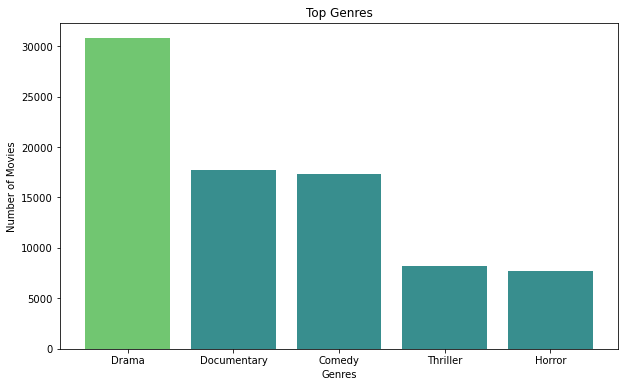

In [44]:
figure, ax = plt.subplots(figsize=(10, 6))
colors = ['#71C671', '#388E8E','#388E8E','#388E8E','#388E8E']

ax.bar(x = top_5.index , height = top_5['movie_id'], color= colors)
ax.set_title('Top Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Movies')
;

## Conclusion
According to what is contained in the data sets, we can observe the five most popular genres are Drama, Docummentary, Comedy, Thriller, and Horror. When we consider what kinds of movies to create at Microsof's new studio, we advise pursuing those areas.